In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sooluh","key":"5c351e902316fb4d7446fc40642f4099"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 62 Oct 21 07:53 kaggle.json


In [55]:
!kaggle datasets download -d hwwang98/software-usage-promotion-campaign-uplift-model

  0% 0.00/35.7k [00:00<?, ?B/s]
100% 35.7k/35.7k [00:00<00:00, 55.8MB/s]


In [56]:
!unzip software-usage-promotion-campaign-uplift-model -d dataset
!mv dataset/multi_attribution_sample.csv dataset/sample.csv
!ls -l dataset

Archive:  software-usage-promotion-campaign-uplift-model.zip
  inflating: dataset/multi_attribution_sample.csv  
total 88
-rw-r--r-- 1 root root 86831 Mar 23  2022 sample.csv


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [79]:
df = pd.read_csv('dataset/sample.csv')
df.head()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
0,1,0,1,0,45537,26,26,152205,0,1,17688.36300
1,0,0,1,1,20842,107,70,159038,0,1,14981.43559
2,0,0,0,1,82171,10,7,264935,1,1,32917.13894
3,0,0,0,0,30288,40,39,77522,1,1,14773.76855
4,0,0,1,0,25930,37,43,91446,1,1,17098.69823


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Global Flag      2000 non-null   int64  
 1   Major Flag       2000 non-null   int64  
 2   SMC Flag         2000 non-null   int64  
 3   Commercial Flag  2000 non-null   int64  
 4   IT Spend         2000 non-null   int64  
 5   Employee Count   2000 non-null   int64  
 6   PC Count         2000 non-null   int64  
 7   Size             2000 non-null   int64  
 8   Tech Support     2000 non-null   int64  
 9   Discount         2000 non-null   int64  
 10  Revenue          2000 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 172.0 KB


<Axes: >

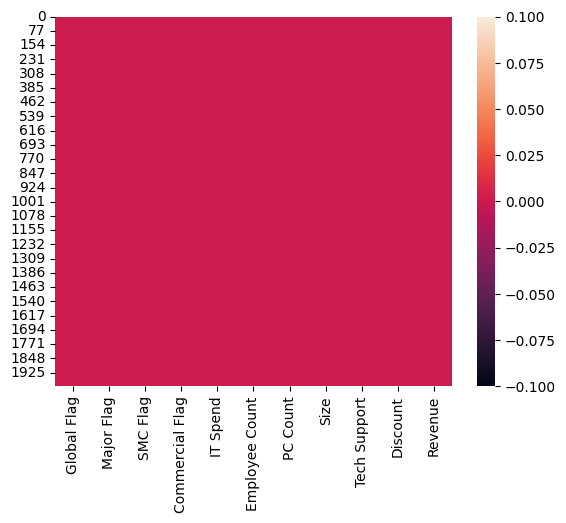

In [81]:
sns.heatmap(df.isnull())

In [82]:
df.describe()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.202000,0.1950,0.504500,0.691000,28272.703000,61.115000,57.345500,113159.120000,0.503000,0.510500,15397.917422
std,0.401593,0.3963,0.500105,0.462197,28207.138885,53.449707,52.861123,100987.600092,0.500116,0.500015,11290.944451
min,0.000000,0.0000,0.000000,0.000000,1161.000000,10.000000,6.000000,10101.000000,0.000000,0.000000,-616.572451
25%,0.000000,0.0000,0.000000,0.000000,8914.000000,24.000000,22.000000,39282.000000,0.000000,0.000000,7545.052008
50%,0.000000,0.0000,1.000000,1.000000,19210.500000,44.000000,41.000000,81378.000000,1.000000,1.000000,12582.446440
75%,0.000000,0.0000,1.000000,1.000000,37991.500000,79.000000,74.000000,155635.000000,1.000000,1.000000,19662.979475
max,1.000000,1.0000,1.000000,1.000000,259808.000000,535.000000,407.000000,766485.000000,1.000000,1.000000,86006.924450


<Axes: >

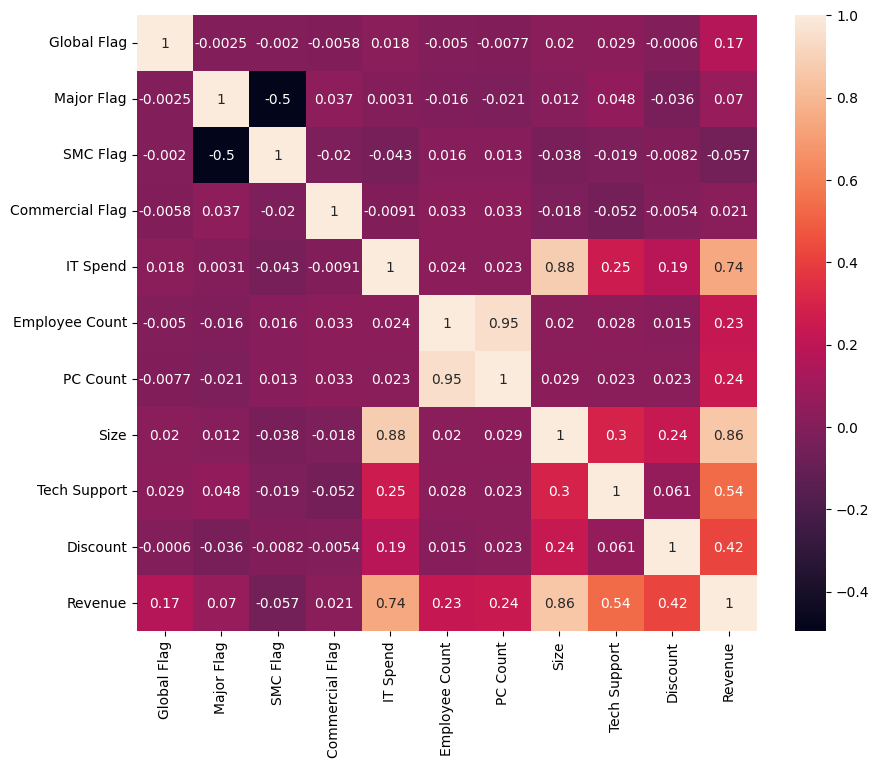

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [84]:
features = ['Global Flag', 'Major Flag', 'SMC Flag', 'Commercial Flag', 'IT Spend', 'Employee Count', 'PC Count', 'Size', 'Tech Support', 'Discount']
X = df[features]
y = df.Revenue
y.shape

(2000,)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=70)
y_test.shape

(500,)

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score * 100)

akurasi model regresi linier =  93.56292993341529


In [87]:
input_data = np.array([[0, 0, 1, 1, 18000, 9, 9, 987500, 1, 0]])

prediction = lr.predict(input_data)
print('estimasi dalam USD :', prediction[0])

estimasi dalam USD : 87219.76688837969


In [88]:
filename = "usage.sav"
pickle.dump(lr, open(filename, 'wb'))

In [102]:
r_squared = r2_score(y_test, pred)
print("R-squared:", r_squared * 100)

R-squared: 93.56292993341529
